# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q = "bitcoin", language = "en")
print(f"Number of Articles: {bitcoin_news['totalResults']}")


Number of Articles: 4147


In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(q = "ethereum", language = "en")
print(f"Number of Articles: {ethereum_news['totalResults']}")

Number of Articles: 1203


In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

def get_sentiment(articles):
    
    btc_sentiment = []
    # Go through each article
    for article in articles:
        #print(article['content'])
        try:
            text      = article["content"]            
            sentiment = analyzer.polarity_scores(text)
            compound  = sentiment['compound']
            pos       = sentiment['pos']
            neg       = sentiment['neg']
            neu       = sentiment['neu']

                        
            btc_sentiment.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral":  neu,
                "Positive": pos,
                "text":     text
            })
        except AttributeError:
            pass
    
    
    return pd.DataFrame(btc_sentiment)


In [7]:
btc_sentiments = get_sentiment(bitcoin_news['articles'])
btc_sentiments.head()

,Compound,Negative,Neutral,Positive,text
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
2,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,0.2500,0.000,0.941,0.059,"2018’s jokes are 2020’s reality. I’m speaking,..."


In [8]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiment = get_sentiment(ethereum_news['articles'])
ethereum_sentiment.head()

,Compound,Negative,Neutral,Positive,text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
4,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ..."


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.081058,0.030105,0.916684,0.053158
std,0.387828,0.067357,0.089156,0.055291
min,-0.670500,0.000000,0.716000,0.000000
25%,0.000000,0.000000,0.850000,0.000000
50%,0.000000,0.000000,0.947000,0.050000
75%,0.238150,0.000000,1.000000,0.066500
max,0.704100,0.215000,1.000000,0.174000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.243110,0.02150,0.892350,0.086150
std,0.367842,0.05291,0.107833,0.089333
min,-0.493900,0.00000,0.672000,0.000000
25%,0.000000,0.00000,0.876000,0.000000
50%,0.220350,0.00000,0.912000,0.079000
75%,0.498075,0.00000,1.000000,0.123000
max,0.946800,0.19600,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum 

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
wnl = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("'s")
stop.append("u")
stop.append("it'")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [16]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_sentiment['tokens'] = ethereum_sentiment.text.apply(tokenizer)
ethereum_sentiment.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[PayPal, bringing, newly-announced, support, c..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[FILE, PHOTO, Representation, Ethereum, virtua..."
4,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ...","[PayPal, launched, Generosity, Network, platfo..."


In [16]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_sentiments['tokens'] = btc_sentiments.text.apply(tokenizer)
btc_sentiments.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...,"[President, Trump, tweeted, insult, Twitter, m..."
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...,"[announcing, launching, managed, blockchain, s..."
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...,"[Captain, Kirk, neo-Dadaists, Repugnant, marke..."
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ...","[long, cryptocurrency, exists, extraordinaryle..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc_sentiments.text.str.cat()), N)
Counter(grams).most_common(20)

[(('LONDON', 'Reuters'), 5),
 (('virtual', 'currency'), 4),
 (('FILE', 'PHOTO'), 4),
 (('poster', 'participating'), 3),
 (('char', 'FILE'), 3),
 (('PHOTO', 'Representation'), 3),
 (('Representation', 'Ethereum'), 3),
 (('Ethereum', 'virtual'), 3),
 (('char', 'LONDON'), 3),
 (('former', 'Microsoft'), 2),
 (('Microsoft', 'software'), 2),
 (('software', 'engineer'), 2),
 (('engineer', 'Ukraine'), 2),
 (('Ukraine', 'sentenced'), 2),
 (('sentenced', 'nine'), 2),
 (('nine', 'year'), 2),
 (('year', 'prison'), 2),
 (('prison', 'stealing'), 2),
 (('stealing', '10'), 2),
 (('10', 'million'), 2)]

In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(ethereum_sentiment.text.str.cat()), N)
Counter(grams).most_common(20)

[(('FILE', 'PHOTO'), 5),
 (('virtual', 'currency'), 5),
 (('LONDON', 'Reuters'), 5),
 (('Reuters', 'Bitcoin'), 5),
 (('char', 'FILE'), 4),
 (('seen', 'illustration'), 4),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 4),
 (('YORK', 'Reuters'), 4),
 (('PHOTO', 'Representation'), 3),
 (('Representation', 'Ethereum'), 3),
 (('Ethereum', 'virtual'), 3),
 (('char', 'LONDON'), 3),
 (('currency', 'Bitcoin'), 3),
 (('Bitcoin', 'seen'), 3),
 (('illustration', 'taken'), 3),
 (('2020', 'REUTERS/Dado'), 3),
 (('NEW', 'YORK'), 3),
 (('highest', 'level'), 3),
 (('currency', 'standing'), 2),
 (('standing', 'PC'), 2)]

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_words = tokenizer(' '.join(btc_sentiments['text']))          
bitcoin_count = token_count(bitcoin_words)
bitcoin_count 

[('char', 19),
 ('currency', 7),
 ('Bitcoin', 6),
 ('2018', 5),
 ('bitcoin', 5),
 ('virtual', 5),
 ('LONDON', 5),
 ('Reuters', 5),
 ('Microsoft', 4),
 ('cryptocurrency', 4)]

In [25]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_words = tokenizer(' '.join(ethereum_sentiment['text']))          
ethereum_count = token_count(ethereum_words)
ethereum_count

[('char', 20),
 ('Reuters', 11),
 ('Bitcoin', 10),
 ('currency', 7),
 ('Ethereum', 6),
 ('virtual', 6),
 ('FILE', 5),
 ('PHOTO', 5),
 ('seen', 5),
 ('illustration', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

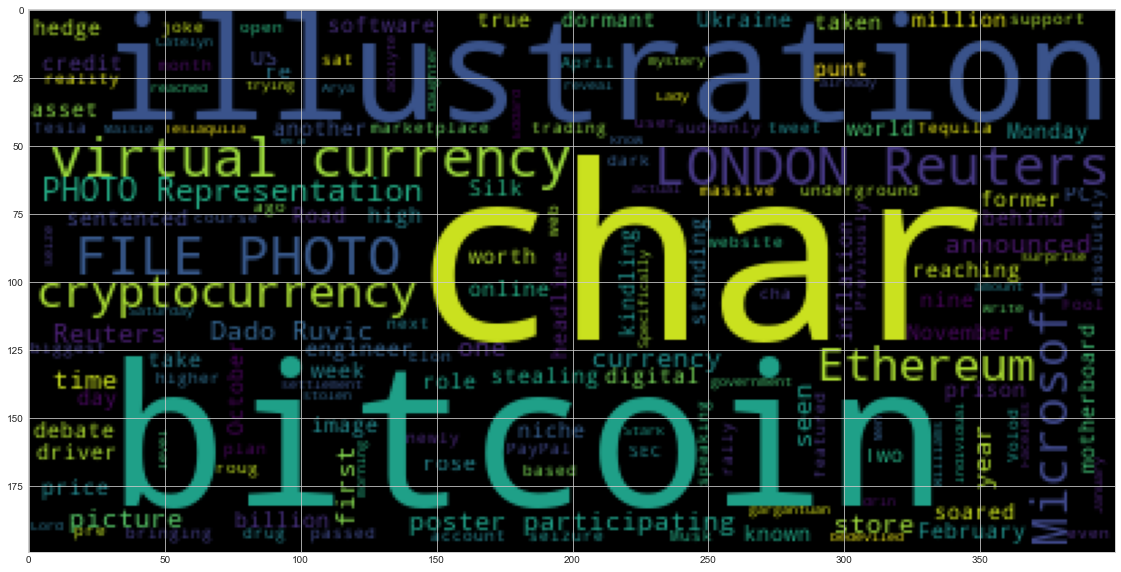

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
big_string = ' '.join(bitcoin_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

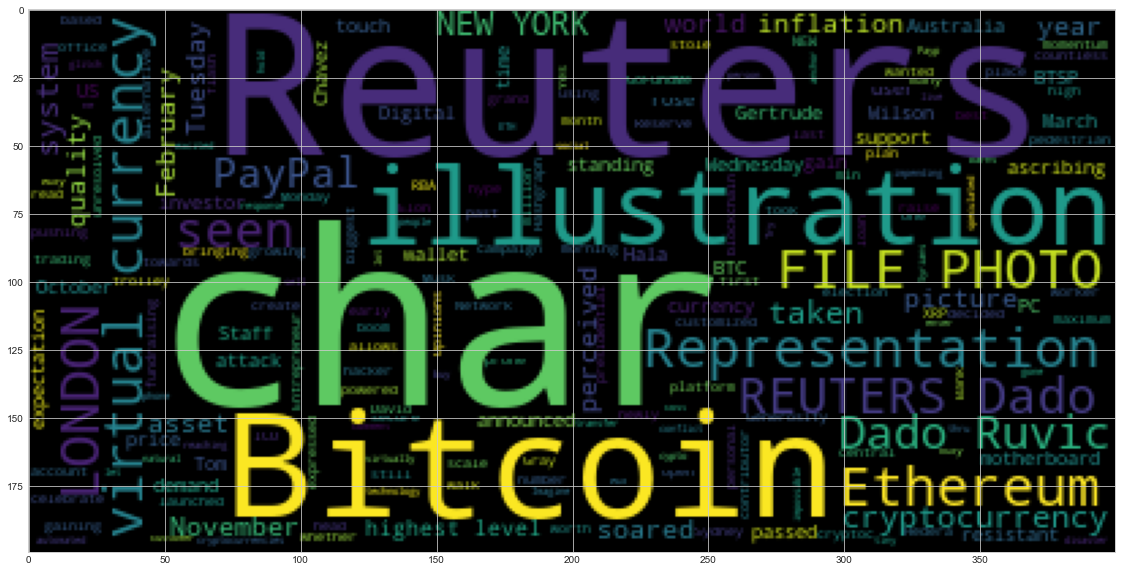

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(ethereum_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [33]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc_sentiments.text.str.cat()
all_btc_text

'A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft\'s online store. From 2016 to 2018, Volod… [+3307 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]2018’s jokes are 2020’s reality. I’m speaking, of course, about Tesla Tequila. Previously featured in an April Fool’s tweet from Elon Musk (pre

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bit_doc = nlp(all_btc_text)
# Add a title to the document
# YOUR CODE HERE!
bit_doc.user_data["title"] = "BITCOIN NER"

In [36]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bit_doc, style='ent', jupyter=True)

In [37]:
# List all Entities
# YOUR CODE HERE!
doc.ents

(Microsoft,
 Ukraine,
 nine years,
 more than $10 million,
 Microsoft,
 2016 to 2018,
 US,
 first,
 US,
 October,
 days ago,
 about $1 billion,
 bitcoin,
 the Silk Road,
 2013,
 one,
 November 2017,
 two-month,
 Bitcoin,
 10,000,
 first,
 the next 20 days,
 19,665,
 chars]2018,
 2020,
 Tesla Tequila,
 April,
 Elon Musk,
 Teslaquila,
 U.S.,
 Individual X,
 chars]4,
 4,
 one,
 above $14,000,
 Saturday,
 morning,
 first,
 January 2018,
 Williams,
 Arya Stark,
 Lady Catelyn,
 Eddard,
 acolyte,
 the Faceless Men,
 Monday,
 $1 billion,
 Silk Road,
 Ross Ulbricht,
 this week,
 chars]1,
 1,
 Microsoft,
 Ukraine,
 nine years,
 more than $10 million,
 Microsoft,
 chars]8,
 7,
 Bitcoin,
 above $18,000,
 Tuesday,
 evening,
 December 2017,
 this week,
 more than $18,000,
 Bitcoin,
 March 13, 2020,
 REUTERS/,
 Tom Wilson,
 Justin HarperBusiness,
 BBC News,
 Bitcoin,
 above $17,000,
 12,800,
 three-year,
 February 3, 2018,
 REUTERS/,
 Reuters,
 Reuters,
 XRP,
 Monday,
 February 3, 2018,
 REUTERS/,
 R

---

## Ethereum NER

In [38]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!
all_eth_text = ethereum_sentiment.text.str.cat()
all_eth_text

'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just l

In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [41]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent', jupyter=True)

In [42]:
# List all Entities
# YOUR CODE HERE!
eth_doc.ents

(PayPal,
 US,
 first,
 US,
 October,
 February 3, 2018,
 REUTERS/,
 Reuters,
 Reuters,
 XRP,
 Monday,
 February 3, 2018,
 REUTERS/,
 Reuters,
 the Generosity Network,
 20,000,
 the Reserve Bank of Australia,
 Sydney,
 Australia,
 March 7, 2017,
 David Gray,
 World News,
 Reuters,
 2020,
 U.S.,
 Wednesday,
 morning,
 Elon Musk,
 early February this year,
 last month,
 October,
 $24 million,
 8, 2020,
 5 min,
 ICO,
 Bitcoin,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Reuters,
 Bitcoin,
 November 19, 2020,
 REUTERS/,
 Reuters,
 Hedera,
 Syrians,
 Hala Systems,
 Paypal,
 1,
 Bitcoin,
 Ethereum,
 bitcoin,
 Payp,
 ETH,
 0.00011,
 about 5¢,
 Tom Wilson,
 Chavez-Dreyfuss,
 LONDON,
 Reuters,
 Bitcoin,
 Tuesday,
 December 2017,
 YORK,
 Reuters,
 Grayscale,
 Wednesday,
 a record $10.4 billion,
 Reuters,
 Bitcoin,
 17,000,
 Tuesday,
 this year,
 Reuters,
 Bitcoin,
 17,000,
 Tuesday,
 this year,
 Bitcoin,
 March 13, 2020,
 REUTERS/,
 Tom Wilson)